# Analyzing Stock prices

#### This project contains 4 parts:
    1. Preparation for data cleaning. Trying to perform data cleaning on smallest file and look for potential flaws of data.
    2. Compressing and performing data cleaning process.
    3. Creating tables and loading data.
    4. Ploting data to get some information.

In [110]:
# Libraries :

import os
import csv

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. Perform ETL process:
    - #### 1. Preparing for data cleaning Process.
    - #### 2. Performing this process over all files.
    - #### 3. Loading data to a database.

### 1. File preparation:
    - I want to merge all contents of each folder into newly created file.
    - I changed file format into CSV, to make it consistent across all data sources.
    - Below I check some basic information to inspect a file.

In [111]:



class ProcessDirectory():
    """
    A class that represents a directory processing utility.

    Attributes:
        processing_dir (str): The directory path to be processed.
        header_written (bool): Flag indicating whether the header has been written to the output CSV file.

    Methods:
        process_directory_to_csv(root=None): Processes the directory and converts text files to CSV format.
        _write_to_csv(data): Writes the data to the output CSV file.
    """

    def __init__(self, processing_dir):
        self.processing_dir = processing_dir
        self.header_written = False

    def process_directory_to_csv(self, root=None):
        """
        Processes the directory and converts text files to CSV format.

        Args:
            root (str, optional): The root directory path. Defaults to None.
        """
        try:
            for root, _, files in os.walk(self.processing_dir):

                for file in files:
                    if file.endswith('.txt'):
                        file_path = os.path.join(root, file)
                        with open(file_path, 'r') as txt_file:
                            data = txt_file.read()
                        self._write_to_csv(data)
                        os.remove(file_path)

        except Exception as e:
            print(f"An error occurred: {e}")

    def _write_to_csv(self, data):
        """
        Writes the data to the output CSV file.

        Args:
            data (str): The data to be written to the CSV file.
        """
        csv_file = os.path.join(self.processing_dir, 'output.csv')
        with open(csv_file, "a+") as csv_file:
            csv_file.seek(0)
            if not csv_file.read(1):
                csv_file.write(data + '\n')
            else:
                rows = data.split('\n')
                csv_file.write('\n'.join(rows[1:]) + '\n')

    def __str__(self):
        return self.processing_dir


In [112]:
directory = 'C:/Users/paha3/Desktop/us_data/'
process_list = os.listdir(directory)

In [129]:
for i in process_list:
    path = directory + i
    ProcessDirectory(path).process_directory_to_csv()

In [114]:
file_list = []

for root, _, files in os.walk(directory):
    for file in files:
        if file.endswith('.csv'):
            file_path = os.path.join(root, file)
            file_list.append(file_path)
            print(file_path)

C:/Users/paha3/Desktop/us_data/nasdaq etfs\output.csv
C:/Users/paha3/Desktop/us_data/nasdaq stocks\output.csv
C:/Users/paha3/Desktop/us_data/nyse etfs\output.csv
C:/Users/paha3/Desktop/us_data/nyse stocks\output.csv


In [115]:
df = pd.read_csv(file_list[0])
df.head()

,<TICKER>,<PER>,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>,<OPENINT>
0,AADR.US,D,20100721,0,23.1646,23.1646,22.7969,22.7969,45503.680331,0
1,AADR.US,D,20100722,0,23.4621,23.4621,23.1929,23.3129,18940.045747,0
2,AADR.US,D,20100723,0,23.5713,23.5713,23.1471,23.3324,9345.970392,0
3,AADR.US,D,20100726,0,23.4426,23.4426,23.2768,23.4153,20422.524157,0
4,AADR.US,D,20100727,0,23.3031,23.3411,23.2603,23.3411,8882.567736,0


### II. Columns and NaN values:
    - Removing redundant columns.
    - Removing "<", ">" signs.
    - Checking for missing(NaN) values.

In [116]:
df.drop(["<PER>", "<TIME>", "<OPENINT>"], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 894024 entries, 0 to 894023
Data columns (total 7 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   <TICKER>  894024 non-null  object 
 1   <DATE>    894024 non-null  int64  
 2   <OPEN>    894024 non-null  float64
 3   <HIGH>    894024 non-null  float64
 4   <LOW>     894024 non-null  float64
 5   <CLOSE>   894024 non-null  float64
 6   <VOL>     894024 non-null  float64
dtypes: float64(5), int64(1), object(1)
memory usage: 47.7+ MB


In [117]:
df.columns = df.columns.str.replace("<", "").str.replace(">", "")
df.head()

,TICKER,DATE,OPEN,HIGH,LOW,CLOSE,VOL
0,AADR.US,20100721,23.1646,23.1646,22.7969,22.7969,45503.680331
1,AADR.US,20100722,23.4621,23.4621,23.1929,23.3129,18940.045747
2,AADR.US,20100723,23.5713,23.5713,23.1471,23.3324,9345.970392
3,AADR.US,20100726,23.4426,23.4426,23.2768,23.4153,20422.524157
4,AADR.US,20100727,23.3031,23.3411,23.2603,23.3411,8882.567736


In [118]:
df.isnull().sum()

TICKER    0
DATE      0
OPEN      0
HIGH      0
LOW       0
CLOSE     0
VOL       0
dtype: int64

### III. Looking for row duplicates, converting datatypes and searching for outliers and deviations:
    - Searching for rows to remove.
    - Changing data type.
    - Checking for potential outliers and removing them.

In [119]:
# Remove exact duplicates
exact_duplicates = df[df.duplicated(keep=False)]

print(exact_duplicates)

Empty DataFrame
Columns: [TICKER, DATE, OPEN, HIGH, LOW, CLOSE, VOL]
Index: []


In [120]:
print(df.dtypes)

TICKER     object
DATE        int64
OPEN      float64
HIGH      float64
LOW       float64
CLOSE     float64
VOL       float64
dtype: object


In [121]:
df['DATE'] = pd.to_datetime(df['DATE'], format='%Y%m%d')
df['DATE'] = df['DATE'].dt.date
print(df.dtypes)

TICKER     object
DATE       object
OPEN      float64
HIGH      float64
LOW       float64
CLOSE     float64
VOL       float64
dtype: object


In [122]:
df.head()

,TICKER,DATE,OPEN,HIGH,LOW,CLOSE,VOL
0,AADR.US,2010-07-21,23.1646,23.1646,22.7969,22.7969,45503.680331
1,AADR.US,2010-07-22,23.4621,23.4621,23.1929,23.3129,18940.045747
2,AADR.US,2010-07-23,23.5713,23.5713,23.1471,23.3324,9345.970392
3,AADR.US,2010-07-26,23.4426,23.4426,23.2768,23.4153,20422.524157
4,AADR.US,2010-07-27,23.3031,23.3411,23.2603,23.3411,8882.567736


Looking for outliers using boxplot.

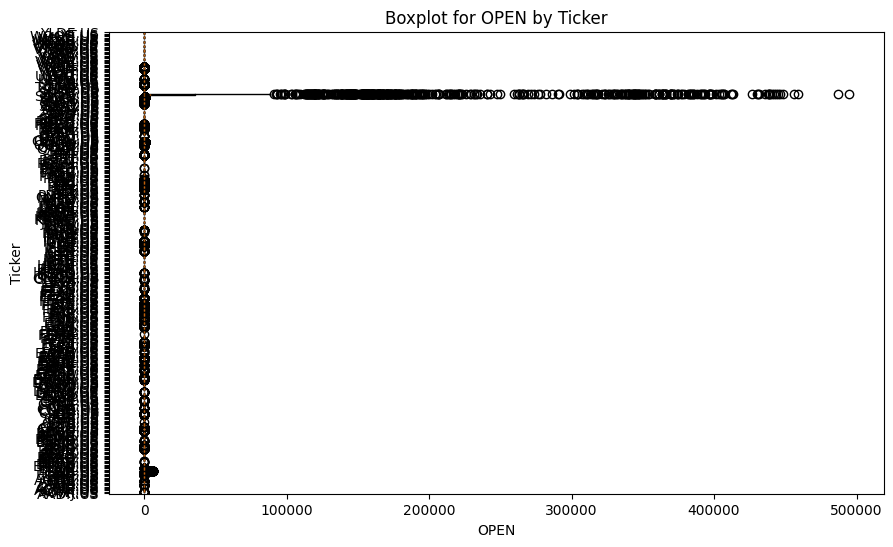

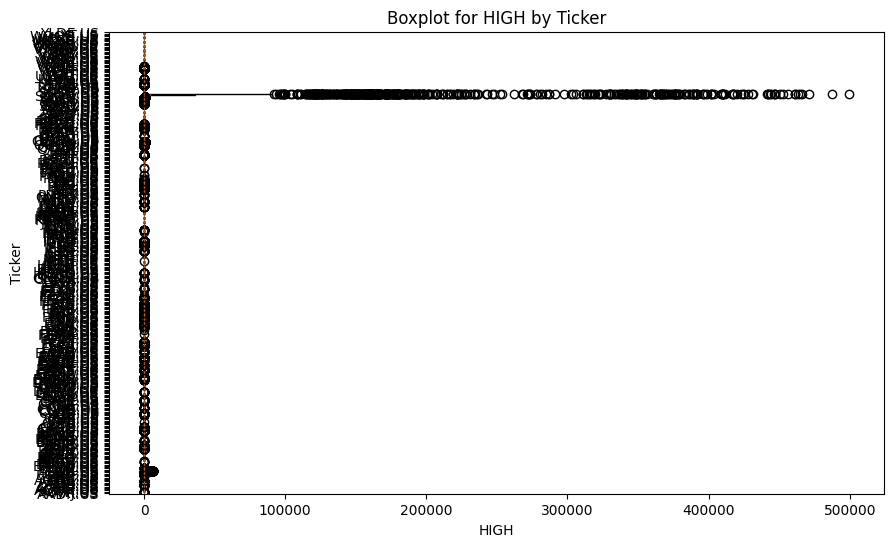

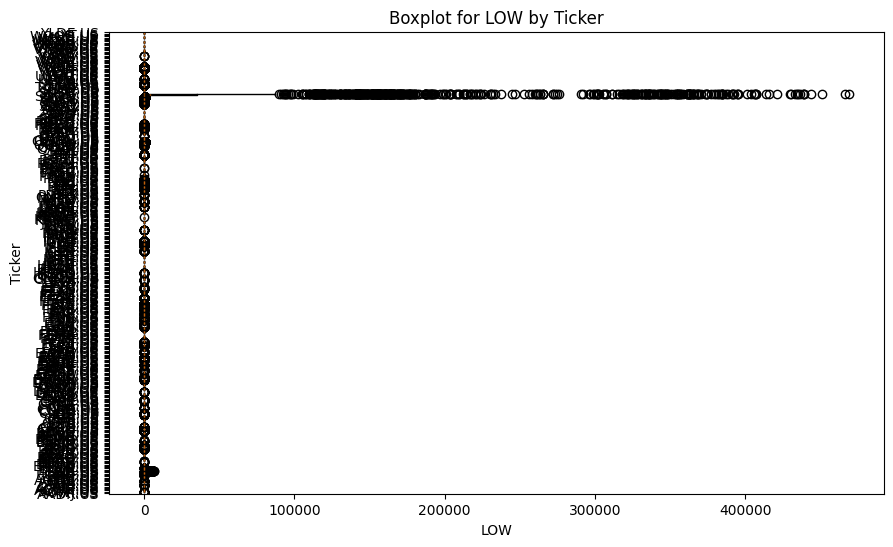

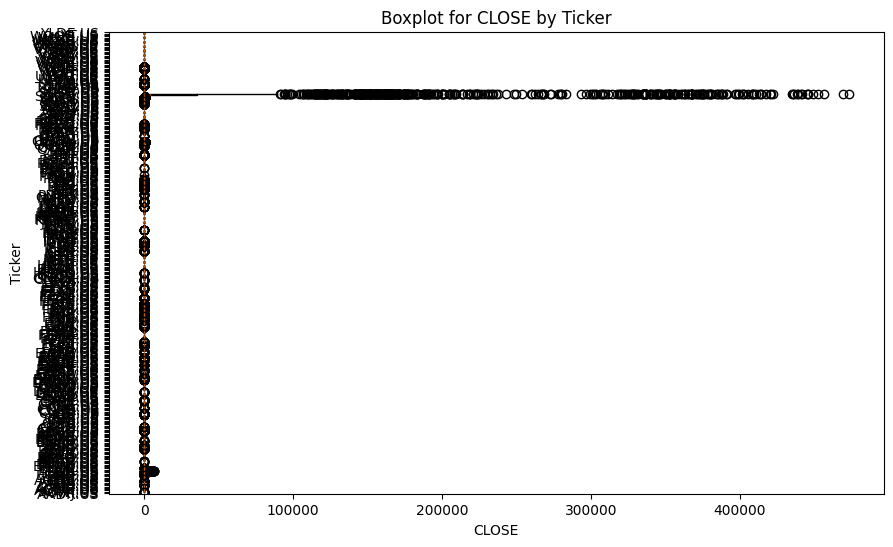

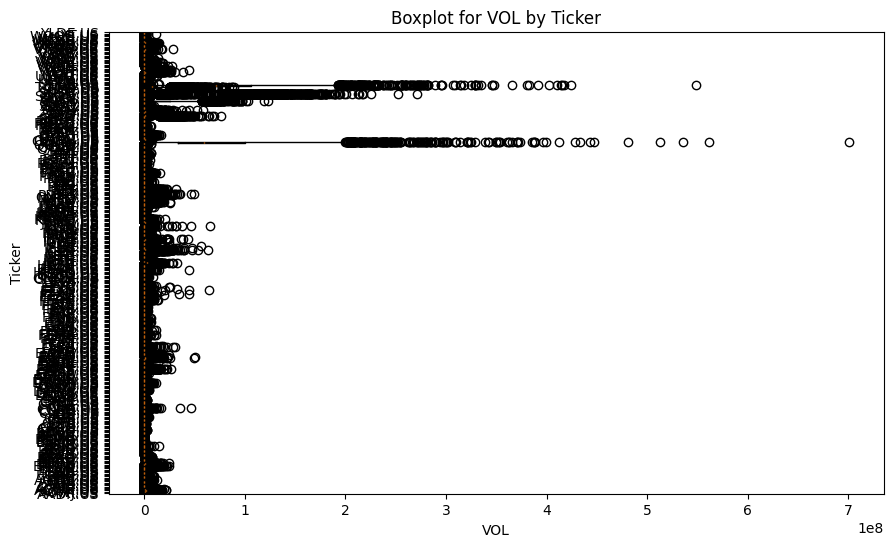

In [123]:
unique_tickers = df['TICKER'].unique()

# Iterate over each ticker
df_sorted = df.sort_values(by=['TICKER', 'DATE'])

# Group the data by 'TICKER'
grouped = df_sorted.groupby('TICKER')

# Plotting boxplot for each column
for column in ['OPEN', 'HIGH', 'LOW', 'CLOSE', 'VOL']:
    plt.figure(figsize=(10, 6))
    plt.boxplot([group[column].dropna() for name, group in grouped], vert=False, labels=[name for name, _ in grouped])
    plt.title(f"Boxplot for {column} by Ticker")
    plt.xlabel(column)
    plt.ylabel('Ticker')
    plt.show()

Based on what I saw it doesn't really represent any outliers and this 'jumps' are behavior of bancrupt stocks, so I'll leave it as it be.

Checking for outliers in 'TICKER'

In [124]:
df_copy = df.copy()

ticker_counts = df_copy['TICKER'].value_counts()
rare_tickers = ticker_counts[ticker_counts == 1].index
df_copy = df_copy[~df_copy['TICKER'].isin(rare_tickers)]

print(df_copy['TICKER'].value_counts())

TICKER
QQQ.US     6275
SOXX.US    4776
IEF.US     4775
IUSG.US    4775
IUSV.US    4775
           ... 
CEFA.US     694
IHYF.US     676
BKCH.US     652
IBTK.US     646
BRRR.US      24
Name: count, Length: 357, dtype: int64


In [125]:
df.head()

,TICKER,DATE,OPEN,HIGH,LOW,CLOSE,VOL
0,AADR.US,2010-07-21,23.1646,23.1646,22.7969,22.7969,45503.680331
1,AADR.US,2010-07-22,23.4621,23.4621,23.1929,23.3129,18940.045747
2,AADR.US,2010-07-23,23.5713,23.5713,23.1471,23.3324,9345.970392
3,AADR.US,2010-07-26,23.4426,23.4426,23.2768,23.4153,20422.524157
4,AADR.US,2010-07-27,23.3031,23.3411,23.2603,23.3411,8882.567736


### I. Combining all what I did in preparation process and defining functions.

In [130]:
class TransformData():
    def __init__(self, df):
        self.df = df

    def drop_columns(self, columns):
        df = self.df.drop([columns], axis=1, inplace=True)

    def format_columns(self):
        if "<" and ">" in self.df.columns[0]:
            self.df.columns = self.df.columns.str.replace("<", "").str.replace(">", "")
        else:
            pass

        self.df.columns = self.df.columns.str.lower()

    def rename_columns(self, old_column, new_column):
        if old_column in self.df.columns:
            self.df.rename(columns={old_column: new_column}, inplace=True)
        else:
            pass

    def convert_date(self):
        df['date'] = pd.to_datetime(df['date'], format='%Y%m%d')
        df['date'] = df['date'].dt.date

    def round_column(self, column, decimal_places):
        self.df[column] = self.df[column].round(decimal_places)

In [131]:
for file in file_list:
    df = pd.read_csv(file)
    transformer = TransformData(df)
    transformer.format_columns()
    transformer.drop_columns("per")
    transformer.drop_columns("time")
    transformer.drop_columns("openint")
    transformer.rename_columns("open", "daily_open")
    transformer.rename_columns("high", "daily_high")
    transformer.rename_columns("low", "daily_low")
    transformer.rename_columns("close", "daily_close")
    transformer.rename_columns("vol", "daily_volume")
    transformer.round_column("daily_open", 4)
    transformer.round_column("daily_high", 4)
    transformer.round_column("daily_low", 4)
    transformer.round_column("daily_close", 4)
    transformer.round_column("daily_volume", 4)
    transformer.convert_date()
    

    print(df.head())

    df.to_csv(file, index=False)

    ticker        date  daily_open  daily_high  daily_low  daily_close  \
0  AADR.US  2010-07-21     23.1646     23.1646    22.7969      22.7969   
1  AADR.US  2010-07-22     23.4621     23.4621    23.1929      23.3129   
2  AADR.US  2010-07-23     23.5713     23.5713    23.1471      23.3324   
3  AADR.US  2010-07-26     23.4426     23.4426    23.2768      23.4153   
4  AADR.US  2010-07-27     23.3031     23.3411    23.2603      23.3411   

   daily_volume  
0    45503.6803  
1    18940.0457  
2     9345.9704  
3    20422.5242  
4     8882.5677  
    ticker        date  daily_open  daily_high  daily_low  daily_close  \
0  AACG.US  2008-01-28      0.7380      0.7380     0.7380       0.7380   
1  AACG.US  2008-01-29      0.7380      0.7760     0.6657       0.6797   
2  AACG.US  2008-01-30      0.6797      0.7108     0.6448       0.6603   
3  AACG.US  2008-01-31      0.6595      0.8001     0.6595       0.7418   
4  AACG.US  2008-02-01      0.7714      0.7721     0.7380       0.7387   

  

In [13]:
for file in file_list:
    print(file, end='\n')

C:/Users/paha3/Desktop/us_data/nasdaq etfs\output.csv
C:/Users/paha3/Desktop/us_data/nasdaq stocks\output.csv
C:/Users/paha3/Desktop/us_data/nyse etfs\output.csv
C:/Users/paha3/Desktop/us_data/nyse stocks\output.csv
